<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/Dicoding_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-06-19 09:30:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.62MB/s    in 53s     

2020-06-19 09:31:41 (5.83 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(validation_dir)
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

In [ ]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

FileExistsError: ignored

In [ ]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))

for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
#Build the CNN 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(16, kernel_size=(4,4), activation = 'relu', input_shape=(150, 150 ,3), padding='same' ))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size=(4,4), activation = 'relu', input_shape=(150, 150 ,3), padding='same' ))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', input_shape=(150, 150 ,3), padding='same' ))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 150, 150, 16)      784       
_________________________________________________________________
dropout_45 (Dropout)         (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 75, 75, 32)        8224      
_________________________________________________________________
dropout_46 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 37, 37, 64)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
#Train the Model
hist = model.fit(train_generator,steps_per_epoch=25,epochs=30,validation_data=validation_generator,validation_steps=3,verbose=1,callbacks=[early_stopping_monitor])

Epoch 1/30
25/25 [==============================] - 41s 2s/step - loss: 1.3603 - accuracy: 0.4005 - val_loss: 1.0696 - val_accuracy: 0.3646
Epoch 2/30
25/25 [==============================] - 32s 1s/step - loss: 0.9920 - accuracy: 0.5000 - val_loss: 0.9898 - val_accuracy: 0.4583
Epoch 3/30
25/25 [==============================] - 34s 1s/step - loss: 0.9382 - accuracy: 0.5713 - val_loss: 0.9809 - val_accuracy: 0.5625
Epoch 4/30
25/25 [==============================] - 33s 1s/step - loss: 0.8317 - accuracy: 0.6425 - val_loss: 0.7991 - val_accuracy: 0.7188
Epoch 5/30
25/25 [==============================] - 33s 1s/step - loss: 0.7644 - accuracy: 0.6806 - val_loss: 0.7922 - val_accuracy: 0.6437
Epoch 6/30
25/25 [==============================] - 35s 1s/step - loss: 0.7218 - accuracy: 0.6996 - val_loss: 0.7139 - val_accuracy: 0.8021
Epoch 7/30
25/25 [==============================] - 33s 1s/step - loss: 0.6419 - accuracy: 0.7375 - val_loss: 0.6653 - val_accuracy: 0.6771
Epoch 8/30
25/25 [==

In [ ]:
#Get the models accuracy
model.evaluate(train_generator)[1]

55/55 [==============================] - 26s 466ms/step


0.9428244829177856

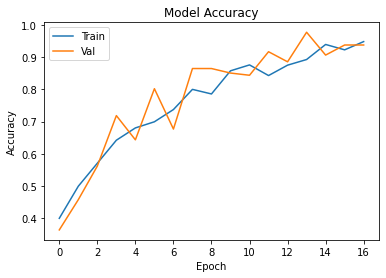

In [ ]:
#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

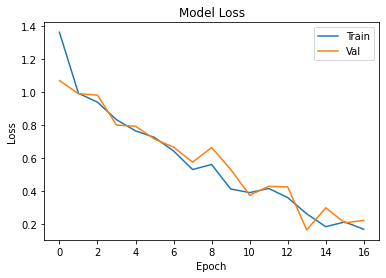

In [ ]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
scissors


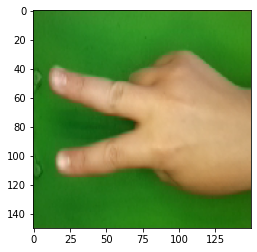

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path,target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  labels = ['paper', 'rock', 'scissors']
  print(labels[np.argmax(classes)])